In [18]:
import pandas as pd
df = pd.read_csv('Walmart_Sales.csv')

In [19]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [22]:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False


In [23]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week.astype(int)
TARGET = "Weekly_Sales"

In [24]:
df["Temp_Fuel_Interaction"] = df["Temperature"] * df["Fuel_Price"]
df["CPI_Unemployment_Interaction"] = df["CPI"] * df["Unemployment"]

In [25]:
df_model = df.drop(columns=["Date"])
X = df_model.drop(columns=[TARGET])
y = df_model[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

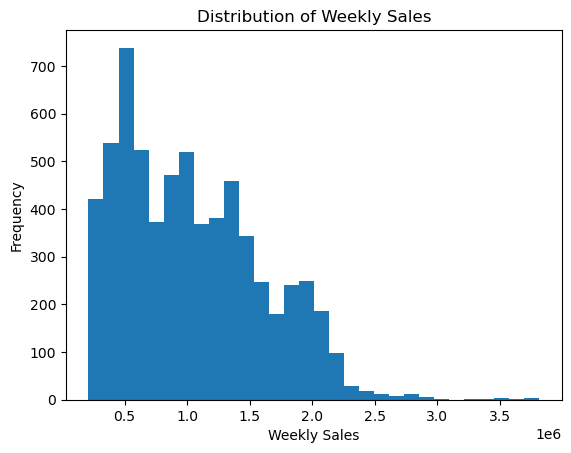

In [27]:
plt.figure()
plt.hist(df["Weekly_Sales"], bins=30)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

In [28]:
results = {}
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results["Linear Regression"] = {"MAE": mean_absolute_error(y_test, y_pred_lr),"RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),"R2": r2_score(y_test, y_pred_lr)}

In [29]:
rf = RandomForestRegressor(n_estimators=300,max_depth=15,random_state=42,n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results["Random Forest"] = {"MAE": mean_absolute_error(y_test, y_pred_rf),"RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),"R2": r2_score(y_test, y_pred_rf)}

In [30]:
if xgb_available:
    xgb = XGBRegressor(n_estimators=400,learning_rate=0.05,max_depth=6,subsample=0.8,colsample_bytree=0.8,random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    results["XGBoost"] = {"MAE": mean_absolute_error(y_test, y_pred_xgb),"RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),"R2": r2_score(y_test, y_pred_xgb)}

In [31]:
results_df = pd.DataFrame(results).T
print("\nMODEL COMPARISON\n")
print(results_df)


MODEL COMPARISON

                             MAE           RMSE        R2
Linear Regression  409849.323927  499690.596489  0.224935
Random Forest       62851.876921  115421.428851  0.958647
